# 이곳의 내용은 [깃허브 페이지](https://ud803.github.io/post/%EC%98%81%ED%99%94%EC%A7%84%ED%9D%A5%EC%9C%84%EC%9B%90%ED%9A%8C-API%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-2017%EB%85%84-%EA%B0%9C%EB%B4%89-%EC%98%81%ED%99%94-%EB%B6%84%EC%84%9D/)에 정리되어 있습니다.
# 위 페이지를 방문해주세요.

In [48]:
import pandas as pd
import datetime
import requests

key1 = 'e0f27edf813489bbe5941e56d7758f96'
key2 = '7975154f617e4c0b37b03777e4b902b1'

#4Kjm_DGwvOenDHMl7kot
key3 = 'ile82tHYI_'

In [84]:
url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json'
url2 = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=e0f27edf813489bbe5941e56d7758f96&targetDt=20170101&curPage=3'

payload={
        'key' : key1,
        'targetDt' : "20170101",
        'itemPerPage' : "10",
        'multiMovieYn' : "Y",
        'repNationCd' : "F",
        #'curPage' : '3'
        }
req = requests.get(url, params=payload)
print(req.status_code)

200


In [52]:
req.json()['boxOfficeResult']

{'boxofficeType': '일별 박스오피스',
 'dailyBoxOfficeList': [{'audiAcc': '55937',
   'audiChange': '-14.4',
   'audiCnt': '2085',
   'audiInten': '-352',
   'movieCd': '20161763',
   'movieNm': '나, 다니엘 블레이크',
   'openDt': '2016-12-08',
   'rank': '1',
   'rankInten': '2',
   'rankOldAndNew': 'OLD',
   'rnum': '1',
   'salesAcc': '444884100',
   'salesAmt': '18037800',
   'salesChange': '-12.2',
   'salesInten': '-2497400',
   'salesShare': '21.3',
   'scrnCnt': '39',
   'showCnt': '65'},
  {'audiAcc': '14591',
   'audiChange': '-25.8',
   'audiCnt': '1885',
   'audiInten': '-656',
   'movieCd': '19890291',
   'movieNm': '해리가 샐리를 만났을 때',
   'openDt': '1989-11-18',
   'rank': '2',
   'rankInten': '0',
   'rankOldAndNew': 'OLD',
   'rnum': '2',
   'salesAcc': '114237200',
   'salesAmt': '16580900',
   'salesChange': '-24.3',
   'salesInten': '-5310400',
   'salesShare': '19.6',
   'scrnCnt': '76',
   'showCnt': '103'},
  {'audiAcc': '25618',
   'audiChange': '-24.5',
   'audiCnt': '1687',
   'au

In [86]:
def crawl_data(start_date, end_date, keys =key1) :
    
    dict_list = []
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json'

    for single_date in pd.date_range(start_date, end_date) :
        for multi, rep in zip(["Y", "Y", "N", "N"], ["K", "F", "K", "F"]) :
            #print(multi, rep)
            print(single_date)
            payload={
            'key' : keys,
            'targetDt' : single_date.strftime('%Y%m%d'),
            'itemPerPage' : '10',
            'multiMovieYn' : multi,
            'repNationCd' : rep
            }
            req = requests.get(url, params = payload)
            #print(req.json())
            for item in req.json()['boxOfficeResult']['dailyBoxOfficeList'] :
                temp_list = []
                key_list = []
                for key, value in item.items() :
                    key_list.append(key)
                    temp_list.append(value)
                temp_list.append(single_date)
                key_list.append('CurrentDate')
                temp_list.append(multi)
                temp_list.append(rep)
                key_list.append('multi')
                key_list.append('Nation')
                dict_list.append(temp_list)
            #print("done")

    return pd.DataFrame(dict_list, columns=key_list)

In [87]:
a = crawl_data("20170101", "20180301", keys=key1)

a

2017-01-01 00:00:00
2017-01-01 00:00:00
2017-01-01 00:00:00
2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-03 00:00:00
2017-01-03 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-04 00:00:00
2017-01-04 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-05 00:00:00
2017-01-05 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-06 00:00:00
2017-01-06 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-07 00:00:00
2017-01-07 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-08 00:00:00
2017-01-08 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-09 00:00:00
2017-01-09 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-10 00:00:00
2017-01-10 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-11 00:00:00
2017-01-11 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-12 00:00:00
2017-01-12 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-13 00:00:00


,salesInten,showCnt,scrnCnt,rankInten,salesShare,salesAmt,rank,audiChange,audiAcc,rnum,...,salesChange,salesAcc,audiCnt,movieCd,movieNm,rankOldAndNew,audiInten,CurrentDate,multi,Nation
0,-964300,11,10,0,30.0,765700,1,-52.1,2354,1,...,-55.7,17988700,93,20161701,위켄즈,OLD,-101,2017-01-01,Y,K
1,241000,2,2,4,17.5,447000,2,192,54529,2,...,117,385404200,73,20161603,순종,OLD,48,2017-01-01,Y,K
2,-309600,6,5,-1,16.1,410000,3,-36.8,192728,3,...,-43,1511840600,60,20162545,"무현, 두 도시 이야기",OLD,-35,2017-01-01,Y,K
3,-149000,3,3,-1,12.4,315000,4,-40.6,22418,4,...,-32.1,183011100,38,20159286,연애담,OLD,-26,2017-01-01,Y,K
4,-76500,3,3,-1,7.3,186000,5,-36.4,10229,5,...,-29.1,81314500,21,20164527,부릉! 부릉! 브루미즈: 스피더의 모험 일기,OLD,-12,2017-01-01,Y,K
5,-28500,4,4,2,4.3,109000,6,0,274,6,...,-20.7,1704500,18,20153401,파파좀비,OLD,0,2017-01-01,Y,K
6,-67000,2,2,0,3.3,84000,7,-40,10698,7,...,-44.4,81080600,12,20162608,나의 살던 고향은,OLD,-8,2017-01-01,Y,K
7,53000,2,2,7,2.9,73000,8,175,1957,8,...,265,11442500,11,20163011,우리 손자 베스트,OLD,7,2017-01-01,Y,K
8,89000,1,1,0,3.5,89000,9,100,17894,9,...,100,145651200,10,20169730,당신자신과 당신의 것,NEW,10,2017-01-01,Y,K
9,48000,1,1,0,1.9,48000,10,100,1239,10,...,100,8286500,7,20154428,야근 대신 뜨개질,NEW,7,2017-01-01,Y,K


In [88]:
a.shape

(16833, 21)

In [1152]:
movie = pd.read_csv("dat1.csv")

movie.head()

,salesInten,showCnt,scrnCnt,rankInten,salesShare,salesAmt,rank,audiChange,audiAcc,rnum,...,salesChange,salesAcc,audiCnt,movieCd,movieNm,rankOldAndNew,audiInten,CurrentDate,multi,Nation
0,-964300,11,10,0,30.0,765700,1,-52.1,2354,1,...,-55.7,17988700,93,20161701,위켄즈,OLD,-101,2017-01-01,Y,K
1,241000,2,2,4,17.5,447000,2,192.0,54529,2,...,117.0,385404200,73,20161603,순종,OLD,48,2017-01-01,Y,K
2,-309600,6,5,-1,16.1,410000,3,-36.8,192728,3,...,-43.0,1511840600,60,20162545,"무현, 두 도시 이야기",OLD,-35,2017-01-01,Y,K
3,-149000,3,3,-1,12.4,315000,4,-40.6,22418,4,...,-32.1,183011100,38,20159286,연애담,OLD,-26,2017-01-01,Y,K
4,-76500,3,3,-1,7.3,186000,5,-36.4,10229,5,...,-29.1,81314500,21,20164527,부릉! 부릉! 브루미즈: 스피더의 모험 일기,OLD,-12,2017-01-01,Y,K


In [1150]:
a.tail()

AttributeError: 'list' object has no attribute 'tail'

In [89]:
a.to_csv("dat1.csv", index=False)

In [115]:
movie_list = a.movieCd.drop_duplicates()

In [124]:
def crawl_movie_data(lists, keys = key2) :
    
    dict_list = dict()
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json'
    

    for movie in lists :
        print(movie)
        payload={
        'key' : keys,
        'movieCd' : movie
        }
        
        req = requests.get(url, params = payload)
        dict_list[movie] = req.json()['movieInfoResult']['movieInfo']

    return dict_list

In [125]:
b = crawl_movie_data(movie_list)

20161701
20161603
20162545
20159286
20164527
20153401
20162608
20163011
20169730
20154428
20161763
19890291
20160221
19930396
20166401
19920315
20164526
20080975
20128588
20164855
20161725
20144641
20152371
20154661
19550028
20163963
20167689
20163183
20162025
20167904
20161872
20162727
20162183
20165285
20165543
20162365
20156062
20161806
20163041
20157064
20165153
20030028
20150966
20165925
20080893
20081065
20156322
19970022
20129633
20163014
20151181
20154342
20165822
20010130
20120401
20155223
20167286
20168523
20168381
20145486
20101406
20164485
20164388
20178942
20161084
20165061
20165144
20140256
20164928
20167159
20151228
20168667
20168710
20168711
20167285
20120383
20151229
19880070
20152062
19880104
20168624
20165724
19688044
20120111
19990191
20165443
20110014
20163186
20100511
20164421
20157631
20160261
20163845
20167324
19388001
20098728
20167843
20168324
20162481
20168246
20156807
20167127
20160881
20153450
20164852
2010A522
19478011
19608010
19628012
19538016
20166077
2

In [134]:
b.keys()

dict_keys(['20176049', '20162442', '19358005', '20173181', '20172404', '20175054', '20175244', '20173035', '20167148', '19950241', '20170964', '20141708', '20175601', '19450011', '20175502', '20170602', '20151227', '20175662', '20172354', '20173923', '20172662', '20101178', '20174882', '20176102', '20148676', '20172741', '19698042', '20156708', '19738119', '20090065', '20172424', '20180142', '20172802', '20176232', '20160021', '20159647', '20173095', '20178887', '20158951', '20177063', '20177473', '20151782', '19538021', '20177701', '20175504', '20176061', '20174803', '20173804', '20154523', '20170241', '20176682', '20144482', '20101131', '20150566', '20110876', '20167362', '20165521', '20178641', '20177041', '20164981', '20162607', '20167885', '20174663', '20172241', '20162568', '20167689', '20161081', '20174846', '20170030', '20141706', '20169643', '20167829', '20178603', '20160504', '20155483', '19508006', '20178141', '20179382', '20175943', '20072141', '19518016', '20168766', '2016

In [1153]:
movie_detail = b.copy()

In [1158]:
movie_detail['20176049']

{'actors': [{'cast': '',
   'castEn': '',
   'peopleNm': '아담 드라이버',
   'peopleNmEn': 'Adam Driver'},
  {'cast': '',
   'castEn': '',
   'peopleNm': '골시프테 파라하니',
   'peopleNmEn': 'Golshifteh Farahani'}],
 'audits': [{'auditNo': '2017-MF01966', 'watchGradeNm': '12세이상관람가'}],
 'companys': [{'companyCd': '20123058',
   'companyNm': '그린나래미디어(주)',
   'companyNmEn': '',
   'companyPartNm': '배급사'},
  {'companyCd': '20123058',
   'companyNm': '그린나래미디어(주)',
   'companyNmEn': '',
   'companyPartNm': '수입사'}],
 'directors': [{'peopleNm': '짐 자무쉬', 'peopleNmEn': 'Jim Jarmusch'}],
 'genres': [{'genreNm': '드라마'}],
 'movieCd': '20176049',
 'movieNm': '패터슨',
 'movieNmEn': 'Paterson',
 'movieNmOg': '',
 'nations': [{'nationNm': '프랑스'}, {'nationNm': '독일'}, {'nationNm': '미국'}],
 'openDt': '20171221',
 'prdtStatNm': '개봉',
 'prdtYear': '2016',
 'showTm': '118',
 'showTypes': [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'}],
 'staffs': [],
 'typeNm': '장편'}

In [254]:
# 17년 개봉작 중 18년도 넘어간 것 골라내기

movie = pd.read_csv("dat1.csv")

movie.head()

,salesInten,showCnt,scrnCnt,rankInten,salesShare,salesAmt,rank,audiChange,audiAcc,rnum,...,salesChange,salesAcc,audiCnt,movieCd,movieNm,rankOldAndNew,audiInten,CurrentDate,multi,Nation
0,-964300,11,10,0,30.0,765700,1,-52.1,2354,1,...,-55.7,17988700,93,20161701,위켄즈,OLD,-101,2017-01-01,Y,K
1,241000,2,2,4,17.5,447000,2,192.0,54529,2,...,117.0,385404200,73,20161603,순종,OLD,48,2017-01-01,Y,K
2,-309600,6,5,-1,16.1,410000,3,-36.8,192728,3,...,-43.0,1511840600,60,20162545,"무현, 두 도시 이야기",OLD,-35,2017-01-01,Y,K
3,-149000,3,3,-1,12.4,315000,4,-40.6,22418,4,...,-32.1,183011100,38,20159286,연애담,OLD,-26,2017-01-01,Y,K
4,-76500,3,3,-1,7.3,186000,5,-36.4,10229,5,...,-29.1,81314500,21,20164527,부릉! 부릉! 브루미즈: 스피더의 모험 일기,OLD,-12,2017-01-01,Y,K


In [1189]:
temp_new = movie.groupby(['movieCd'])

temp_11 = pd.DataFrame({'min' : temp_new['CurrentDate'].min(),
                       'max' : temp_new['CurrentDate'].max(),
                       'movieNm' : temp_new['movieNm'].min()})

print(temp_11[temp_11.movieNm.str.contains('스파이더맨')])
print(temp_11[temp_11.movieNm.str.contains('신과함께')])

                 max         min      movieNm
movieCd                                      
20167303  2017-08-18  2017-06-30  스파이더맨: 홈 커밍
                 max         min    movieNm
movieCd                                    
20150976  2018-03-01  2017-12-11  신과함께-죄와 벌


In [1163]:
movie_use = movie[ (movie.openDt >= '2017-01-01') & (movie.openDt <= '2017-12-31')]

movie_use.shape

(12306, 21)

In [1172]:
temp = movie_use.groupby(['movieCd'])

temp_df = pd.DataFrame( {'openDt' : temp['openDt'].max(), 'currentDate' : temp['CurrentDate'].max()}).reset_index()
temp_df = temp_df[temp_df.currentDate > '2017-12-31']
temp_df

#이제 여기 속한 애들은 다르게 그루핑 하면된다.

,movieCd,currentDate,openDt
10,20150976,2018-03-01,2017-12-20
19,20154427,2018-02-10,2017-07-20
24,20155324,2018-01-06,2017-11-09
38,20160465,2018-01-22,2017-12-14
39,20160477,2018-02-03,2017-12-28
40,20160483,2018-02-11,2017-05-31
54,20161681,2018-02-27,2017-11-09
61,20161872,2018-01-17,2017-01-04
70,20162869,2018-01-21,2017-08-02
78,20162986,2018-01-06,2017-11-30


In [1162]:
movie[movie.movieCd.isin(movie_use)]

,salesInten,showCnt,scrnCnt,rankInten,salesShare,salesAmt,rank,audiChange,audiAcc,rnum,...,salesChange,salesAcc,audiCnt,movieCd,movieNm,rankOldAndNew,audiInten,CurrentDate,multi,Nation


In [285]:
# movie1 은 18년 넘어선애들
# movie2는 17년 안에서만 있는 애들
movie1 = movie_use[movie_use.movieCd.isin(temp_df.movieCd)]
movie2 = movie_use[ ~(movie_use.movieCd.isin(temp_df.movieCd))]
movie_total = pd.concat([movie1, movie2], ignore_index=True)
movie1.shape[0] + movie2.shape[0]

12306

In [372]:
temp_df = pd.DataFrame( {'movieCd' :movie_total.movieCd.drop_duplicates()})

temp_df['Rate'] = 0
temp_df.head()

,movieCd,Rate
0,20161872,0
39,20160477,0
41,20164859,0
48,20173301,0
53,20160465,0


In [587]:
b['20150976']

{'actors': [{'cast': '강림',
   'castEn': '',
   'peopleNm': '하정우',
   'peopleNmEn': 'HA Jung-woo'},
  {'cast': '자홍',
   'castEn': '',
   'peopleNm': '차태현',
   'peopleNmEn': 'CHA Tae-hyun'},
  {'cast': '해원맥', 'castEn': '', 'peopleNm': '주지훈', 'peopleNmEn': 'JU Ji-hoon'},
  {'cast': '덕춘',
   'castEn': '',
   'peopleNm': '김향기',
   'peopleNmEn': 'KIM Hyang-gi'},
  {'cast': '성주신', 'castEn': '', 'peopleNm': '마동석', 'peopleNmEn': 'Don LEE'},
  {'cast': '수홍',
   'castEn': '',
   'peopleNm': '김동욱',
   'peopleNmEn': 'KIM Dong-wook'},
  {'cast': '원일병',
   'castEn': '',
   'peopleNm': '도경수',
   'peopleNmEn': 'DOH Kyung-soo'},
  {'cast': '', 'castEn': '', 'peopleNm': '오달수', 'peopleNmEn': 'OH Dal-su'},
  {'cast': '', 'castEn': '', 'peopleNm': '임원희', 'peopleNmEn': 'LIM Won-hee'},
  {'cast': '', 'castEn': '', 'peopleNm': '장광', 'peopleNmEn': 'JANG Kwang'},
  {'cast': '',
   'castEn': '',
   'peopleNm': '정해균',
   'peopleNmEn': 'JEONG Hae-gyoon'},
  {'cast': '', 'castEn': '', 'peopleNm': '김수안', 'peopleNmEn'

In [374]:
temp_df.iloc[i,0][:4]

'2017'

In [410]:
# import os
from IPython.display import clear_output

for i in range(len(temp_df)) :    
    url = 'https://openapi.naver.com/v1/search/movie.json'
    payload = {
        'query' : b[temp_df.iloc[i, 0]]['movieNm']
        , 'display' : 10
    }

    headers = {
        'X-Naver-Client-Id' : '4Kjm_DGwvOenDHMl7kot',
        'X-Naver-Client-Secret' : 'ile82tHYI_'
    }
    
        
    
    if  (temp_df.iloc[i,1] == 0) | (temp_df.iloc[i,1] == 'NA') :
        print(temp_df.iloc[i,0], b[temp_df.iloc[i, 0]]['movieNm'] + b[temp_df.iloc[i, 0]]['movieNmEn'] )

        count = 0
        try :
            req = requests.get(url, headers=headers, params=payload)
            req.json()['total']
        except :
            print("ERROR!")
            temp_df.iloc[i,1] = "NA"
        else :
            if(req.json()['total'] == 1) :
                print(req.json()['items'][0]['userRating'])
                temp_df.iloc[i,1] = req.json()['items'][0]['userRating']
            else :
                print(b[temp_df.iloc[i,0]]['directors'])
                inp = input('Type Rating')
                temp_df.iloc[i,1] = float(inp)
                clear_output()

In [377]:
rate_df

,movieCd,Rate
0,20161872,8.75
39,20160477,7.25
41,20164859,6.45
48,20173301,9.22
53,20160465,9.01
60,20175047,9.09
71,20164844,6.11
93,20176061,9.11
96,20160483,8.63
127,20168041,6.96


In [412]:
temp_df.to_csv("movieRating.csv", index=False)

### 1. 2017년 개봉작 중 가장 인기있는 영화는 무엇이었을까?

우선 앞서 구한 movie1과 movie2 데이터를 가져온다.

movie1은 18년 넘어서까지 있는 애들
movie2는 17년 안에서만 있는 애들

그러니까 둘 다 그냥 group 해주면 된다!

In [417]:
group1 = movie1.groupby(['movieCd'])
group2 = movie2.groupby(['movieCd'])

# 여기서는 일 매출, 일 상영 횟수, 일 스크린 수, 
# 일 매출, 일 관객, 영화 제목, 다양성, 국내여부, 개봉일 데이터를 모은다

dat1 = pd.DataFrame({
                    'movieNm' : group1['movieNm'].max(),
                    'sales' : group1['salesAmt'].sum(),
                    'screen' : group1['scrnCnt'].sum(),
                    'show' : group1['showCnt'].sum(),
                    'audience' : group1['audiCnt'].sum(),
                    'multi' : group1['multi'].max(),
                    'nation' : group1['Nation'].max(),
                    'openDate' : group1['openDt'].min()
                    }).reset_index()

print(dat1.shape)
dat1.head()

(66, 9)


,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show
0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198
1,20154427,3867,불온한 당신,Y,K,2017-07-20,28908500,349,402
2,20155324,88,소통과 거짓말,Y,K,2017-11-09,506000,11,11
3,20160465,4005,메리 크리스마스 미스터 모,Y,K,2017-12-14,28591800,462,580
4,20160477,1330,나의 연기 워크샵,Y,K,2017-12-28,10067500,171,203


In [503]:
dat2 = pd.DataFrame({
                    'movieNm' : group2['movieNm'].max(),
                    'sales' : group2['salesAmt'].sum(),
                    'screen' : group2['scrnCnt'].sum(),
                    'show' : group2['showCnt'].sum(),
                    'audience' : group2['audiCnt'].sum(),
                    'multi' : group2['multi'].max(),
                    'nation' : group2['Nation'].max(),
                    'openDate' : group2['openDt'].min()
                    }).reset_index()

print(dat2.shape)
dat2.head()

(564, 9)


,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show
0,19918668,2511,고령가 소년 살인사건,Y,F,2017-11-23,36579800,38,40
1,20038755,25974,루터,Y,F,2017-10-18,182892800,950,1321
2,20101178,546,루팡 3세: 칼리오스트로의 성,Y,F,2017-05-25,4072000,101,134
3,20101218,2934,"구름의 저편, 약속의 장소",Y,F,2017-02-28,21885400,377,424
4,20145486,732,소시민,Y,K,2017-01-12,5411200,52,52


최종적으로 아래와 같은 630개의 영화를 얻었다!

630개 영화가 2017년에 국내에서 개봉했다는 것을 알 수 있다.

In [420]:
final_dat = pd.concat([dat1, dat2], ignore_index=True)

print(final_dat.shape)
final_dat.head()

(630, 9)


,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show
0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198
1,20154427,3867,불온한 당신,Y,K,2017-07-20,28908500,349,402
2,20155324,88,소통과 거짓말,Y,K,2017-11-09,506000,11,11
3,20160465,4005,메리 크리스마스 미스터 모,Y,K,2017-12-14,28591800,462,580
4,20160477,1330,나의 연기 워크샵,Y,K,2017-12-28,10067500,171,203


In [1175]:
final_dat[ final_dat.movieNm.str.contains('토르') ]

,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show
44,20175121,4854997,토르: 라그나로크,N,F,2017-10-25,39231580995,33080,137422


이 중 한국영화는 285편, 외국영화는 345편으로 해외 영화가 더 개봉을 많이했다.

In [423]:
print(final_dat[final_dat.nation == 'K'].shape[0])
print(final_dat[final_dat.nation == 'F'].shape[0])

285
345


그럼 지금부터 2017년 개봉작 중 가장 인기가 있었던 작품을 살펴보자.

2017년 말에 개봉한 영화의 매출은 2018년 것까지 합쳤다. 

여기서는 말그대로 2017년 '개봉작'들의 성적을 비교한다.

In [489]:
top10 = final_dat.sort_values(by='sales', ascending=False).head(10).reset_index()

In [490]:
top10

,index,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show
0,0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198
1,8,20162869,12186068,택시운전사,N,K,2017-08-02,95852510649,46163,184061
2,79,20151228,7817524,공조,N,K,2017-01-18,63782557326,33996,142970
3,197,20167303,7255831,스파이더맨: 홈 커밍,N,F,2017-07-05,59102154520,35479,164382
4,25,20170590,7231177,1987,N,K,2017-12-27,58162055145,36703,138203
5,29,20172742,6879911,범죄도시,N,K,2017-10-03,56317354349,39466,149295
6,112,20161481,6591164,군함도,N,K,2017-07-26,50504572168,25833,108711
7,124,20162442,5652862,청년경찰,N,K,2017-08-09,44378539516,29038,118521
8,80,20151229,5316238,더 킹,N,K,2017-01-18,43485622535,25754,107954
9,159,20164721,5135080,미녀와 야수,N,F,2017-03-16,42110166579,36366,140316


In [491]:
top10.sales[1]

95852510649

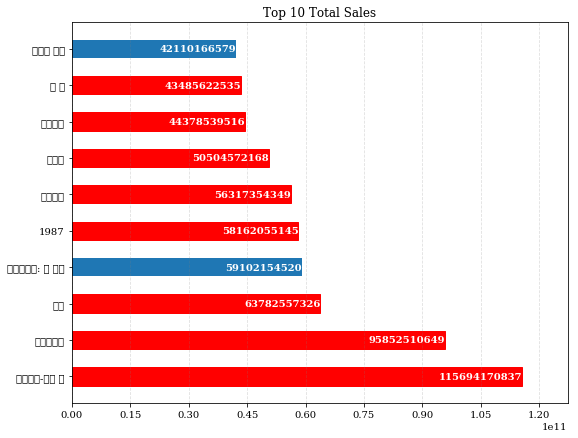

In [560]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import matplotlib.font_manager as fm

#font_location = '/usr/share/fonts/truetype/nanum/NanumGothic_Coding.ttf'

#font_name = fm.FontProperties(fname=font_location).get_name()

#matplotlib.rc('font', family=font_name)

fig, ax1 = plt.subplots(figsize=(9, 7))

fig.subplots_adjust(left=0.115, right=0.88)

pos = np.arange(10)

rects = ax1.barh(pos, top10.sales, align='center', height=0.5, tick_label= top10.movieNm)

ax1.set_title("Top 10 Total Sales")

ax1.set_xlim([0,top10.sales.max()*1.1])
ax1.xaxis.set_major_locator(ticker.MaxNLocator(11))
ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

rect_labels = []
i=0
for rect in rects :
    
    if( top10['nation'][i] == 'K') :
        rect.set_color('r')
    width = int(rect.get_width())
    #print(width)
    rankStr = top10.sales[i]
    
    clr='white'
    align='right'
    xloc = width + 1
    yloc = rect.get_y() + rect.get_height()/2.0
    label = ax1.text(xloc, yloc, rankStr, horizontalalignment=align,
                    verticalalignment='center', color=clr, weight='bold', clip_on=True)
    rect_labels.append(label)
    i += 1
plt.show()

위 매출은 모든 매출을 합한 금액이다.

즉 스크린 파워가 강할수록 매출에 영향을 미치는 것은 당연하기에 이 변수를 고정시키고 살펴볼 필요가 있다.

이번에는 '상영 스크린 수' 대비 매출액을 살펴보겠다.


In [555]:
topScreen = final_dat.sort_values(by='sales', ascending=False).head(10).reset_index()
topScreen['sales/screen'] = topScreen.sales / topScreen.screen

topScreen = topScreen.sort_values(by='sales/screen', ascending=False).reset_index()
topScreen

,level_0,index,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen
0,0,0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198,2.095985e+06
1,1,8,20162869,12186068,택시운전사,N,K,2017-08-02,95852510649,46163,184061,2.076393e+06
2,6,112,20161481,6591164,군함도,N,K,2017-07-26,50504572168,25833,108711,1.955041e+06
3,2,79,20151228,7817524,공조,N,K,2017-01-18,63782557326,33996,142970,1.876178e+06
4,8,80,20151229,5316238,더 킹,N,K,2017-01-18,43485622535,25754,107954,1.688500e+06
5,3,197,20167303,7255831,스파이더맨: 홈 커밍,N,F,2017-07-05,59102154520,35479,164382,1.665835e+06
6,4,25,20170590,7231177,1987,N,K,2017-12-27,58162055145,36703,138203,1.584668e+06
7,7,124,20162442,5652862,청년경찰,N,K,2017-08-09,44378539516,29038,118521,1.528292e+06
8,5,29,20172742,6879911,범죄도시,N,K,2017-10-03,56317354349,39466,149295,1.426984e+06
9,9,159,20164721,5135080,미녀와 야수,N,F,2017-03-16,42110166579,36366,140316,1.157954e+06


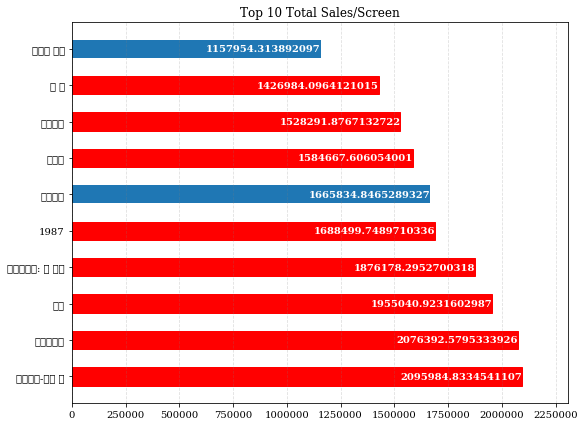

In [561]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import matplotlib.font_manager as fm

#font_location = '/usr/share/fonts/truetype/nanum/NanumGothic_Coding.ttf'

#font_name = fm.FontProperties(fname=font_location).get_name()

#matplotlib.rc('font', family=font_name)

fig, ax1 = plt.subplots(figsize=(9, 7))

fig.subplots_adjust(left=0.115, right=0.88)

pos = np.arange(10)

rects = ax1.barh(pos, topScreen['sales/screen'], align='center', height=0.5, tick_label= top10.movieNm)

ax1.set_title("Top 10 Total Sales/Screen")

ax1.set_xlim([0,topScreen['sales/screen'].max()*1.1])
ax1.xaxis.set_major_locator(ticker.MaxNLocator(11))
ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

rect_labels = []
i=0
for rect in rects :

    if( topScreen['nation'][i] == 'K') :
        rect.set_color('r')
    width = int(rect.get_width())
    #print(width)
    rankStr = topScreen['sales/screen'][i]
    
    clr='white'
    align='right'
    xloc = width + 1
    yloc = rect.get_y() + rect.get_height()/2.0
    label = ax1.text(xloc, yloc, rankStr, horizontalalignment=align,
                    verticalalignment='center', color=clr, weight='bold', clip_on=True)
    rect_labels.append(label)
    i += 1
plt.show()

{'actors': [{'cast': '',
   'castEn': '',
   'peopleNm': '아담 드라이버',
   'peopleNmEn': 'Adam Driver'},
  {'cast': '',
   'castEn': '',
   'peopleNm': '골시프테 파라하니',
   'peopleNmEn': 'Golshifteh Farahani'}],
 'audits': [{'auditNo': '2017-MF01966', 'watchGradeNm': '12세이상관람가'}],
 'companys': [{'companyCd': '20123058',
   'companyNm': '그린나래미디어(주)',
   'companyNmEn': '',
   'companyPartNm': '배급사'},
  {'companyCd': '20123058',
   'companyNm': '그린나래미디어(주)',
   'companyNmEn': '',
   'companyPartNm': '수입사'}],
 'directors': [{'peopleNm': '짐 자무쉬', 'peopleNmEn': 'Jim Jarmusch'}],
 'genres': [{'genreNm': '드라마'}],
 'movieCd': '20176049',
 'movieNm': '패터슨',
 'movieNmEn': 'Paterson',
 'movieNmOg': '',
 'nations': [{'nationNm': '프랑스'}, {'nationNm': '독일'}, {'nationNm': '미국'}],
 'openDt': '20171221',
 'prdtStatNm': '개봉',
 'prdtYear': '2016',
 'showTm': '118',
 'showTypes': [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'}],
 'staffs': [],
 'typeNm': '장편'}

# 결과가 어떻게 다른지 설명
# 폰트 고치고 나서

### 0. 네이버 평점과 매출의 상관관계

그렇다면 네이버 영화에서 영화의 평점과 매출에는 어떤 관계가 있을까?

여기서는 네티즌들의 평점을 사용하였다.

평점이 0이거나 10인 것들은 제외한다.

In [662]:
topScreen = final_dat.sort_values(by='sales', ascending=False).reset_index()
topScreen['sales/screen'] = topScreen.sales / topScreen.screen

topScreen = topScreen.sort_values(by='sales/screen', ascending=False).reset_index()

rate = pd.read_csv("movieRating.csv")
topScreen.movieCd = topScreen.movieCd.astype('int')

tot = pd.merge(topScreen, rate, on='movieCd', how='inner')
tot = tot[ (tot.Rate != 0) & (tot.Rate != 10)]

In [ ]:
topScreen

In [1280]:
to_won(topScreen[topScreen.multi =='N'].sales.sum())

'1조 7318억 4494만 5036'

In [1285]:
b[temp_df.iloc[0,0]]

{'actors': [{'cast': '강림',
   'castEn': '',
   'peopleNm': '하정우',
   'peopleNmEn': 'HA Jung-woo'},
  {'cast': '자홍',
   'castEn': '',
   'peopleNm': '차태현',
   'peopleNmEn': 'CHA Tae-hyun'},
  {'cast': '해원맥', 'castEn': '', 'peopleNm': '주지훈', 'peopleNmEn': 'JU Ji-hoon'},
  {'cast': '덕춘',
   'castEn': '',
   'peopleNm': '김향기',
   'peopleNmEn': 'KIM Hyang-gi'},
  {'cast': '성주신', 'castEn': '', 'peopleNm': '마동석', 'peopleNmEn': 'Don LEE'},
  {'cast': '수홍',
   'castEn': '',
   'peopleNm': '김동욱',
   'peopleNmEn': 'KIM Dong-wook'},
  {'cast': '원일병',
   'castEn': '',
   'peopleNm': '도경수',
   'peopleNmEn': 'DOH Kyung-soo'},
  {'cast': '', 'castEn': '', 'peopleNm': '오달수', 'peopleNmEn': 'OH Dal-su'},
  {'cast': '', 'castEn': '', 'peopleNm': '임원희', 'peopleNmEn': 'LIM Won-hee'},
  {'cast': '', 'castEn': '', 'peopleNm': '장광', 'peopleNmEn': 'JANG Kwang'},
  {'cast': '',
   'castEn': '',
   'peopleNm': '정해균',
   'peopleNmEn': 'JEONG Hae-gyoon'},
  {'cast': '', 'castEn': '', 'peopleNm': '김수안', 'peopleNmEn'

In [1293]:
top10


,index,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show
0,0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198
1,8,20162869,12186068,택시운전사,N,K,2017-08-02,95852510649,46163,184061
2,79,20151228,7817524,공조,N,K,2017-01-18,63782557326,33996,142970
3,197,20167303,7255831,스파이더맨: 홈 커밍,N,F,2017-07-05,59102154520,35479,164382
4,25,20170590,7231177,1987,N,K,2017-12-27,58162055145,36703,138203
5,29,20172742,6879911,범죄도시,N,K,2017-10-03,56317354349,39466,149295
6,112,20161481,6591164,군함도,N,K,2017-07-26,50504572168,25833,108711
7,124,20162442,5652862,청년경찰,N,K,2017-08-09,44378539516,29038,118521
8,80,20151229,5316238,더 킹,N,K,2017-01-18,43485622535,25754,107954
9,159,20164721,5135080,미녀와 야수,N,F,2017-03-16,42110166579,36366,140316


In [1310]:
tpl = []
for i in range(len(top10)) :
    tpl.append(len(b[top10.iloc[i,1]]['staffs']))
print(sum(tpl), len(tpl))
sum(tpl)/len([i for i in tpl if i != 0])

4000 10


500.0

In [1177]:
tot.to_csv("movie_rating_tot.csv", index=False)

In [1184]:
tot.sort_values(by='Rate', ascending=False)

,level_0,index,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen,Rate
234,377,167,20164951,4112,어폴로지,Y,F,2017-03-16,27307400,131,168,2.084534e+05,9.50
200,234,374,20172641,28469,마리안느와 마가렛,Y,K,2017-04-20,198749400,768,1231,2.587883e+05,9.42
139,109,56,20176947,254545,원더,Y,F,2017-12-27,1947154889,4605,9956,4.228349e+05,9.40
74,44,64,20179462,1394356,위대한 쇼맨,N,F,2017-12-20,11440745000,14863,35802,7.697467e+05,9.37
94,191,245,20168689,28489,반지의 제왕 : 왕의 귀환 (확장판),N,F,2017-01-25,345672500,559,719,6.183766e+05,9.36
71,194,240,20168664,24728,반지의 제왕 : 두개의 탑 (확장판),N,F,2017-01-18,316964100,395,603,8.024408e+05,9.35
47,18,37,20174142,3277679,아이 캔 스피크,N,K,2017-09-21,25515646886,24398,92948,1.045809e+06,9.35
434,429,528,20176041,1742,바람의 춤꾼,Y,K,2017-06-06,10539600,139,171,7.582446e+04,9.35
279,201,18,20169463,37060,다시 태어나도 우리,Y,K,2017-09-27,288191443,1649,2388,1.747674e+05,9.34
148,79,200,20167363,442769,히든 피겨스,N,F,2017-03-23,3526293233,9132,19572,3.861469e+05,9.34


우선 전체 영화 모두에 대해 살펴보았다.

Text(0,0.5,'Rate')

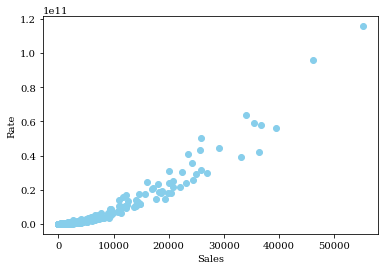

In [1185]:
fig, ax1 = plt.subplots()

ax1.scatter(tot.screen, tot.sales, color='skyblue')

ax1.set_xlabel("Sales")
ax1.set_ylabel("Rate")

Text(0,0.5,'Rate')

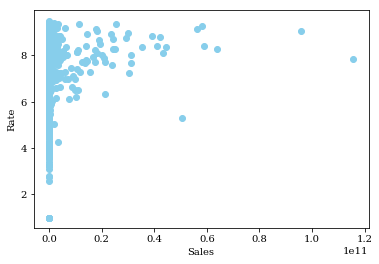

In [663]:
fig, ax1 = plt.subplots()

ax1.scatter(tot.sales, tot.Rate, color='skyblue')

ax1.set_xlabel("Sales")
ax1.set_ylabel("Rate")

9

전체적으로 봤을 때 매출과 평점은 비례한다. 약간은 당연해보이기도 하는 소리다.

하지만 가운데 찍힌 특이점처럼 매출은 높으나 평점은 낮은 특이한 케이스도 발견할 수 있다. (저 가운데 점은 군함도다. 스크린 독과점과 역사 왜곡, 신파극을 이유로 낮은 별점을 받았다.)

그래프를 좀 더 살펴보면 이 둘은 로그관계에 있다는 사실도 발견할 수 있다.

array([[1.        , 0.50625116],
       [0.50625116, 1.        ]])

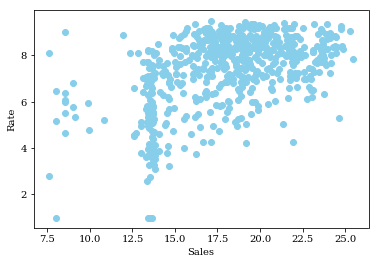

In [664]:
import math

fig, ax1 = plt.subplots()

ax1.scatter(tot.sales.apply(math.log), tot.Rate, color='skyblue')

ax1.set_xlabel("Sales")
ax1.set_ylabel("Rate")

np.corrcoef(tot.sales.apply(math.log), tot.Rate)

위 그림은 매출에 로그를 취한 것이다.

산점도의 모양이 조금 더 대각에 가까워졌고, 상관계수도 0.5로 어느정도 큰 편이다.

이러한 로그 관계는 영화의 속성(다양성 영화, 국내, 해외)에 관계없이 동일하게 나타난다.

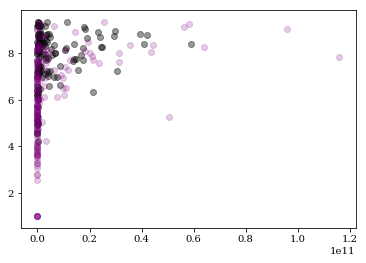

In [665]:
fig, ax1 = plt.subplots()

tot_KM = tot[ (tot.nation == 'K') & (tot.multi == 'Y')]
tot_KNM = tot[ (tot.nation == 'K') & (tot.multi == 'N')]
tot_FM = tot[ (tot.nation == 'F') & (tot.multi == 'Y')]
tot_FNM = tot[ (tot.nation == 'F') & (tot.multi == 'N')]

ax1.scatter(tot_FNM.sales, tot_FNM.Rate, color = 'black', alpha=0.4)
ax1.scatter(tot_KNM.sales, tot_KNM.Rate, color = 'purple', alpha=0.2)

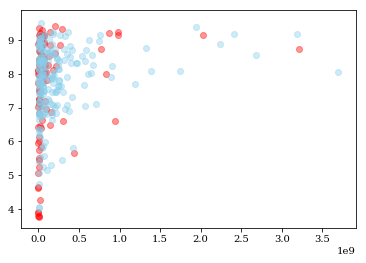

In [666]:
fig, ax1 = plt.subplots()

ax1.scatter(tot_KM.sales, tot_KM.Rate, color = 'red', alpha=0.4)
ax1.scatter(tot_FM.sales, tot_FM.Rate, color = 'skyblue', alpha=0.4)

스크린을 고려한 매출과 평점의 산점도도 마찬가지 추이를 보인다.

Text(0,0.5,'Rate')

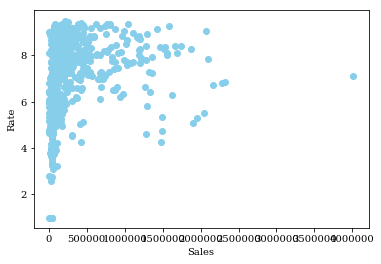

In [667]:
fig, ax1 = plt.subplots()

ax1.scatter(tot['sales/screen'], tot.Rate, color='skyblue')

ax1.set_xlabel("Sales")
ax1.set_ylabel("Rate")

결론내리자면 매출이 낮아도 얼마든 좋은 평점을 받을 수 있지만, 매출이 높은 경우 그 영화의 평점이 낮기는 매우 어렵다는 말이 된다.

### 0. 시간별 매출 증감 추이

이제 한 영화가 개봉하고 난 후 매출이 어떻게 증감하는지 살펴보자.

영화의 특성을 살려서 다양성영화와 상업영화로 나누어서 보겠다.

다시 movie1과 movie2 데이터를 가져온다.

In [704]:
movie_tot = pd.concat([movie1, movie2], ignore_index=True)
movie_tot.shape

movie_multi = movie_tot[movie_tot.multi == 'Y']
movie_comm = movie_tot[movie_tot.multi == 'N']

In [710]:
topScreen = final_dat.copy()
topScreen['sales/screen'] = topScreen.sales / topScreen.screen

top_multi = topScreen[topScreen.multi == 'Y']
top_comm = topScreen[topScreen.multi == 'N']

top_multi = top_multi.sort_values(by='sales', ascending=False).head(10).reset_index()
top_comm = top_comm.sort_values(by='sales', ascending=False).head(10).reset_index()


In [711]:
top_multi

,index,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen
0,320,20171024,463492,너의 췌장을 먹고 싶어,Y,F,2017-10-25,3689543300,5775,16707,638881.956710
1,145,20163845,429558,터닝메카드W: 블랙미러의 부활,Y,K,2017-01-18,3213122000,7399,14052,434264.360049
2,65,20179942,400211,러빙 빈센트,Y,F,2017-11-09,3188330261,8216,15320,388063.566334
3,172,20165153,364102,눈의 여왕 3: 눈과 불의 마법대결,Y,F,2017-01-04,2680363700,5873,10565,456387.485101
4,469,20174801,329695,내 사랑,Y,F,2017-07-12,2411218625,5201,11434,463606.734282
5,584,20178641,317559,빅풋 주니어,Y,F,2017-08-09,2240084000,5773,7923,388027.715226
6,605,20179187,260167,공범자들,Y,K,2017-08-17,2033011800,6398,10918,317757.392935
7,56,20176947,254545,원더,Y,F,2017-12-27,1947154889,4605,9956,422834.937894
8,315,20170964,225543,딥,Y,F,2017-10-03,1744132000,4262,6000,409228.531206
9,180,20165927,174823,문라이트,Y,F,2017-02-22,1384310395,4450,7995,311080.987640


In [712]:
top_comm

,index,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen
0,0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198,2.095985e+06
1,8,20162869,12186068,택시운전사,N,K,2017-08-02,95852510649,46163,184061,2.076393e+06
2,79,20151228,7817524,공조,N,K,2017-01-18,63782557326,33996,142970,1.876178e+06
3,197,20167303,7255831,스파이더맨: 홈 커밍,N,F,2017-07-05,59102154520,35479,164382,1.665835e+06
4,25,20170590,7231177,1987,N,K,2017-12-27,58162055145,36703,138203,1.584668e+06
5,29,20172742,6879911,범죄도시,N,K,2017-10-03,56317354349,39466,149295,1.426984e+06
6,112,20161481,6591164,군함도,N,K,2017-07-26,50504572168,25833,108711,1.955041e+06
7,124,20162442,5652862,청년경찰,N,K,2017-08-09,44378539516,29038,118521,1.528292e+06
8,80,20151229,5316238,더 킹,N,K,2017-01-18,43485622535,25754,107954,1.688500e+06
9,159,20164721,5135080,미녀와 야수,N,F,2017-03-16,42110166579,36366,140316,1.157954e+06


아래는 '너의 췌장을 먹고 싶어'의 그래프.

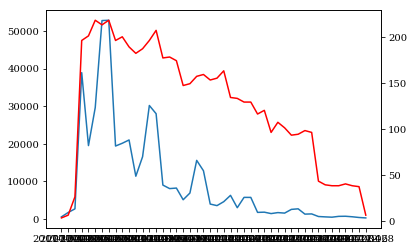

In [732]:
tp_1 = movie_multi[movie_multi.movieCd == '20171024']

fig, ax1 = plt.subplots()

ax1.plot(tp_1.CurrentDate, tp_1.audiCnt)
ax2 =ax1.twinx()

ax2.plot(tp_1.CurrentDate, tp_1.scrnCnt, color='r')

아래는 '터닝메카드'의 그래프.

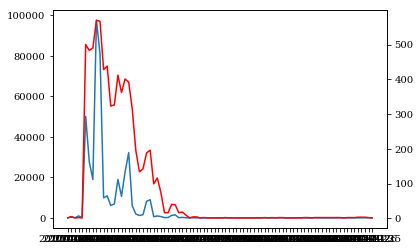

In [735]:
tp_1 = movie_multi[movie_multi.movieCd == '20163845']

fig, ax1 = plt.subplots()

ax1.plot(tp_1.CurrentDate, tp_1.audiCnt)
ax2 =ax1.twinx()

ax2.plot(tp_1.CurrentDate, tp_1.scrnCnt, color='r')

아래는 '신과 함께'의 그래프이다.

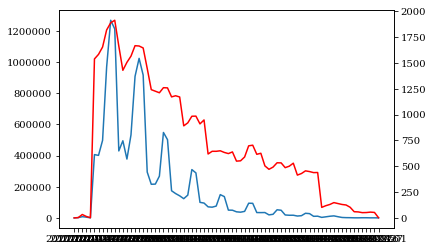

In [734]:
tp_2 = movie_comm[movie_comm.movieCd == '20150976']

fig, ax1 = plt.subplots()

ax1.plot(tp_2.CurrentDate, tp_2.audiCnt)
ax2 =ax1.twinx()

ax2.plot(tp_2.CurrentDate, tp_2.scrnCnt, color='r')

보면 공통적으로 봉우리가 생겨나는데, 이는 주말을 의미한다.

평일 대비 주말 관람객이 압도적으로 많은 것.

마지막으로 아래 그래프는 말 많고 탈 많았던 '군함도'이다.

초반에 흥행하다가 바닥을 찍는다.

붉은 선은 스크린 개수이다.

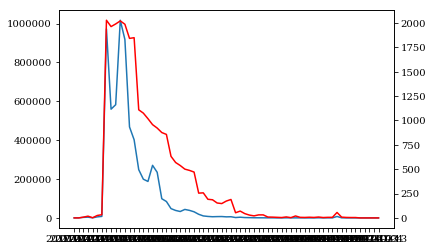

In [730]:
tp_2 = movie_comm[movie_comm.movieCd == '20161481']
fig, ax1 = plt.subplots()
ax1.plot(tp_2.CurrentDate, tp_2.audiCnt)

ax2 = ax1.twinx()

ax2.plot(tp_2.CurrentDate, tp_2.scrnCnt, color='r')

### 0. 스크린 독과점 문제는 심각할까?

이번에는 영화 개봉 순간을 기준으로 각 영화의 상영관 개수와 상영 횟수를 비교해보자.



In [736]:
movie_tot.shape

(12306, 21)

In [738]:
movie_open = pd.DataFrame({'openDt' :movie_tot.groupby(['movieCd'])['openDt'].min()}).reset_index()
movie_open.head()

,movieCd,openDt
0,19918668,2017-11-23
1,20038755,2017-10-18
2,20101178,2017-05-25
3,20101218,2017-02-28
4,20145486,2017-01-12


In [742]:
tp_merge = pd.merge(movie_tot, movie_open, left_on=['movieCd', 'CurrentDate'],
                    right_on=['movieCd', 'openDt'],how='right')
tp_merge.head()

,salesInten,showCnt,scrnCnt,rankInten,salesShare,salesAmt,rank,audiChange,audiAcc,rnum,...,salesAcc,audiCnt,movieCd,movieNm,rankOldAndNew,audiInten,CurrentDate,multi,Nation,openDt_y
0,1.032712e+09,2176.0,555.0,0.0,41.5,1.032712e+09,1.0,100.0,212267.0,1.0,...,1.674170e+09,138028.0,20161872,너의 이름은.,NEW,138028.0,2017-01-04,N,F,2017-01-04
1,1.704570e+07,221.0,164.0,3.0,47.0,1.870170e+07,1.0,1365.7,6420.0,1.0,...,4.367070e+07,3034.0,20173301,"서서평, 천천히 평온하게",OLD,2827.0,2017-04-26,Y,K,2017-04-26
2,6.696477e+08,3800.0,800.0,3.0,73.9,7.133156e+08,1.0,1877.0,121534.0,1.0,...,9.424733e+08,95271.0,20164844,불한당: 나쁜 놈들의 세상,OLD,90452.0,2017-05-17,N,K,2017-05-17
3,1.383250e+07,143.0,76.0,0.0,65.1,1.383250e+07,1.0,100.0,3383.0,1.0,...,2.758100e+07,1800.0,20160483,꿈의 제인,NEW,1800.0,2017-05-31,Y,K,2017-05-31
4,8.979500e+06,272.0,117.0,0.0,30.5,8.979500e+06,1.0,100.0,2655.0,1.0,...,1.681300e+07,1236.0,20168041,용순,NEW,1236.0,2017-06-08,Y,K,2017-06-08


Text(0,0.5,'Show Count')

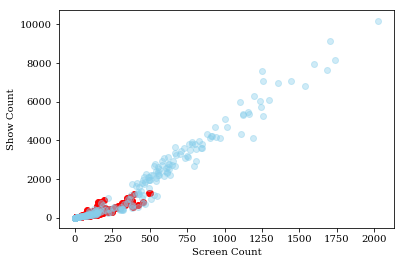

In [748]:
tp_merge_multi = tp_merge[tp_merge.multi == 'Y']
tp_merge_comm = tp_merge[tp_merge.multi == 'N']

plt.scatter(tp_merge_multi.scrnCnt, tp_merge_multi.showCnt, color='r')
plt.scatter(tp_merge_comm.scrnCnt, tp_merge_comm.showCnt, color='skyblue', alpha=0.4)

plt.xlabel("Screen Count")
plt.ylabel("Show Count")

In [865]:
topScreen.head()

,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen
0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198,2.095985e+06
1,20154427,3867,불온한 당신,Y,K,2017-07-20,28908500,349,402,8.283238e+04
2,20155324,88,소통과 거짓말,Y,K,2017-11-09,506000,11,11,4.600000e+04
3,20160465,4005,메리 크리스마스 미스터 모,Y,K,2017-12-14,28591800,462,580,6.188701e+04
4,20160477,1330,나의 연기 워크샵,Y,K,2017-12-28,10067500,171,203,5.887427e+04


In [789]:
temp_df.head()

,movieCd,Rate
0,20161872,8.75
39,20160477,7.25
41,20164859,6.45
48,20173301,9.22
53,20160465,9.01


In [856]:
movie_tot.head()

,salesInten,showCnt,scrnCnt,rankInten,salesShare,salesAmt,rank,audiChange,audiAcc,rnum,...,salesChange,salesAcc,audiCnt,movieCd,movieNm,rankOldAndNew,audiInten,CurrentDate,multi,Nation
0,31854500,342,275,0,7.9,325811500,4,9.5,74181,4,...,10.8,640998500,37418,20161872,너의 이름은.,OLD,3245,2017-01-01,N,F
1,1032712400,2176,555,0,41.5,1032712400,1,100.0,212267,1,...,100.0,1674169900,138028,20161872,너의 이름은.,NEW,138028,2017-01-04,N,F
2,-29235400,2771,780,0,43.8,1003477000,1,-4.0,344730,1,...,-2.8,2677646900,132463,20161872,너의 이름은.,OLD,-5565,2017-01-05,N,F
3,426699183,3320,907,0,48.8,1430176183,1,27.9,514132,1,...,42.5,4107823083,169402,20161872,너의 이름은.,OLD,36939,2017-01-06,N,F
4,1398204276,4061,933,0,49.4,2828380459,1,97.9,849457,1,...,97.8,6936203542,335325,20161872,너의 이름은.,OLD,165923,2017-01-07,N,F


### 0. 이번에는 사람들이 가장 선호한 장르를 살펴보자.



In [891]:
topScreen.head()

,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen
0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198,2.095985e+06
1,20154427,3867,불온한 당신,Y,K,2017-07-20,28908500,349,402,8.283238e+04
2,20155324,88,소통과 거짓말,Y,K,2017-11-09,506000,11,11,4.600000e+04
3,20160465,4005,메리 크리스마스 미스터 모,Y,K,2017-12-14,28591800,462,580,6.188701e+04
4,20160477,1330,나의 연기 워크샵,Y,K,2017-12-28,10067500,171,203,5.887427e+04


In [1190]:
b['20161872']

{'actors': [{'cast': '타치바나 타키 역',
   'castEn': '',
   'peopleNm': '카미키 류노스케',
   'peopleNmEn': 'Ryunosuke Kamiki'},
  {'cast': '미야미즈 미츠하 역',
   'castEn': '',
   'peopleNm': '카미시라이시 모네',
   'peopleNmEn': 'Mone Kamishiraishi'},
  {'cast': '오쿠데라 미키 역',
   'castEn': '',
   'peopleNm': '나가사와 마사미',
   'peopleNmEn': 'Masami Nagasawa'},
  {'cast': '미야미즈 히토하 역',
   'castEn': '',
   'peopleNm': '이치하라 에수코',
   'peopleNmEn': 'Etsuko Ichihara'},
  {'cast': '나토리 사야카 역',
   'castEn': '',
   'peopleNm': '유키 아오이',
   'peopleNmEn': 'Aoi Yuki'},
  {'cast': '후지이 츠카사 역',
   'castEn': '',
   'peopleNm': '시마자키 노부나가',
   'peopleNmEn': 'Nobunaga Shimazaki'},
  {'cast': '타카기 신타 역',
   'castEn': '',
   'peopleNm': '이시카와 카이토',
   'peopleNmEn': 'ISHIKAWA KAITO'},
  {'cast': '미야미즈 요츠하 역',
   'castEn': '',
   'peopleNm': '타니 카논',
   'peopleNmEn': 'Kanon Tani'}],
 'audits': [{'auditNo': '2016-MF01960', 'watchGradeNm': '12세이상관람가'}],
 'companys': [{'companyCd': '20141469',
   'companyNm': '메가박스중앙(주)플러스엠',
   'companyNm

In [895]:
topScreen.shape

(630, 10)

In [932]:
col_name = ['movieCd', 'movieNm', 'genres', 'sales', 'multi', 'nation']

list_temp = []
for i in range(len(temp_df)) :
    if( len(b[temp_df.iloc[i,0]]['genres']) != 0) :
        list_temp.append([temp_df.iloc[i,0], topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[ 0,2],
            b[temp_df.iloc[i,0]]['genres'][0]['genreNm'], topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[0,6],
                         topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[0,3], topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[0,4]])
    else :
        t = temp_df.iloc[i, 0]
list_temp.append([t, '처음엔 다 그래','멜로/로맨스', topScreen[topScreen.movieNm == '처음엔 다 그래'].iloc[0,6],
                 topScreen[topScreen.movieNm == '처음엔 다 그래'].iloc[0,3], topScreen[topScreen.movieNm == '처음엔 다 그래'].iloc[0,4]])

temporary_df = pd.DataFrame(list_temp, columns=col_name)
temporary_df = temporary_df.sort_values(by='sales', ascending=False).reset_index()
temporary_df.head()

,index,movieCd,movieNm,genres,sales,multi,nation
0,46,20150976,신과함께-죄와 벌,판타지,115694170837,N,K
1,11,20162869,택시운전사,드라마,95852510649,N,K
2,83,20151228,공조,액션,63782557326,N,K
3,376,20167303,스파이더맨: 홈 커밍,액션,59102154520,N,F
4,48,20170590,1987,드라마,58162055145,N,K


In [931]:
genre_group = temporary_df.groupby(['genres'])

genre_sales = pd.DataFrame({'sales' :genre_group['sales'].sum(), 'number' : genre_group['movieCd'].count()}).reset_index()
genre_sales['sales/number'] = genre_sales.sales / genre_sales.number / 10**5
genre_sales = genre_sales.sort_values(by='number', ascending=False).reset_index()
genre_sales = genre_sales.iloc[:, 1:]
genre_num_sum = genre_sales.number.sum()
genre_sum = genre_sales.sales.sum()
genre_sales['num_ratio'] = genre_sales.number/ genre_num_sum
genre_sales['sales_ratio'] = genre_sales.sales/genre_sum
genre_sales

,genres,number,sales,sales/number,num_ratio,sales_ratio
0,드라마,168,279859021820,16658.275108,0.266667,0.155534
1,멜로/로맨스,121,46300397540,3826.479136,0.192063,0.025732
2,애니메이션,98,170499486564,17397.906792,0.155556,0.094757
3,액션,54,647290597103,119868.629093,0.085714,0.359738
4,다큐멘터리,47,21656228943,4607.708286,0.074603,0.012036
5,코미디,27,64526368365,23898.654950,0.042857,0.035861
6,스릴러,26,49459694366,19022.959372,0.041270,0.027488
7,범죄,21,245319760219,116818.933438,0.033333,0.136339
8,공포(호러),15,53403540473,35602.360315,0.023810,0.029680
9,미스터리,12,26190708996,21825.590830,0.019048,0.014556


단순히 개봉한 영화의 개수로 보면 드라마와 로맨스 강국답게 드라마와 멜로/로맨스 장르가 가장 많다.

이 둘이 전체 개봉 영화의 약 45%를 차지하고 있다.

In [1198]:
temporary_df[temporary_df.genres =='범죄']

,index,movieCd,movieNm,genres,sales,multi,nation
5,18,20172742,범죄도시,범죄,56317354349,N,K
8,88,20151229,더 킹,범죄,43485622535,N,K
13,30,20165748,꾼,범죄,31310551795,N,K
22,187,20162181,프리즌,범죄,23789780487,N,K
25,393,20154909,살인자의 기억법,범죄,21372103492,N,K
26,247,20162722,보안관,범죄,20842846409,N,K
27,125,20150964,조작된 도시,범죄,20143332587,N,K
46,448,20164174,브이아이피,범죄,10956184835,N,K
56,6,20164844,불한당: 나쁜 놈들의 세상,범죄,7646102125,N,K
83,135,20151230,원라인,범죄,3317437433,N,K


In [930]:
genre_sales = genre_sales.sort_values(by='sales', ascending=False).reset_index()
genre_sales = genre_sales.iloc[:, 1:]

genre_sales

,genres,number,sales,sales/number,ratio
0,액션,54,647290597103,119868.629093,0.359738
1,드라마,168,279859021820,16658.275108,0.155534
2,범죄,21,245319760219,116818.933438,0.136339
3,애니메이션,98,170499486564,17397.906792,0.094757
4,판타지,9,125216844850,139129.827611,0.069591
5,코미디,27,64526368365,23898.654950,0.035861
6,공포(호러),15,53403540473,35602.360315,0.029680
7,스릴러,26,49459694366,19022.959372,0.027488
8,멜로/로맨스,121,46300397540,3826.479136,0.025732
9,사극,2,31437911092,157189.555460,0.017472


위 표를 보면 액션이 전체 매출의 35%를 차지하고 있다. 

그 뒤를 이어 드라마, 범죄, 애니메이션이 각각 순위를 차지했다.

하지만 이는 액션, 드라마 등 인기 장르의 영화가 압도적으로 많기 때문이다.

In [913]:
genre_sales = genre_sales.sort_values(by='sales/number', ascending=False)
genre_sales

,genres,number,sales,sales/number,ratio
11,사극,2,31437911092,157189.555460,0.017472
17,판타지,9,125216844850,139129.827611,0.069591
14,액션,54,647290597103,119868.629093,0.359738
10,범죄,21,245319760219,116818.933438,0.136339
3,공포(호러),15,53403540473,35602.360315,0.029680
0,SF,10,29474504544,29474.504544,0.016381
16,코미디,27,64526368365,23898.654950,0.035861
9,미스터리,12,26190708996,21825.590830,0.014556
12,스릴러,26,49459694366,19022.959372,0.027488
13,애니메이션,98,170499486564,17397.906792,0.094757


이번에는 개봉한 영화의 수를 고려하여 매출의 평균을 계산해보자.

아이러니하게도 숫자가 적은 사극과 판타지가 개봉 대비 매출의 1,2위를 차지했다.

이 장르에 속하는 영화들을 알아보자.

In [923]:
temporary_df[temporary_df.genres =='사극']

,index,movieCd,movieNm,genres,sales
14,511,20165450,남한산성,사극,31220646292
223,573,20173903,역모-반란의 시대,사극,217264800


In [924]:
temporary_df[temporary_df.genres =='판타지']

,index,movieCd,movieNm,genres,sales
0,46,20150976,신과함께-죄와 벌,판타지,115694170837
69,153,20163580,그레이트 월,판타지,4303760158
80,279,20173961,킹 아서: 제왕의 검,판타지,3367198155
154,477,20170607,몬스터 콜,판타지,658636300
170,96,20168324,반지의 제왕 : 반지원정대 (확장판),판타지,444660300
191,118,20168689,반지의 제왕 : 왕의 귀환 (확장판),판타지,345672500
194,107,20168664,반지의 제왕 : 두개의 탑 (확장판),판타지,316964100
328,52,20176513,고스트 스토리,판타지,58979300
379,155,20179961,미인어,판타지,26803200


전체 매출 14위인 '남한산성'의 힘을 얻어 사극이 개봉 대비 매출 1위를 달성했고, 전체 매출 1위인 '신과함께'의 견인을 얻어 판타지가 2위를 달성했다.

### 0. 다양성영화(독립영화)와 상업영화

이번에는 다양성영화(독립영화)와 상업영화를 비교해보자.

다양성영화라 함은 2007년 영화진흥위원회가 발표한 용어로서 독립영화, 예술영화 다큐멘터리영화 등을 총칭하는 말이다.

상업영화와 달리 소규모의 제작비가 들어가고 배급이나 상영도 소규모로 진행된다.

In [933]:
temporary_df.head()

,index,movieCd,movieNm,genres,sales,multi,nation
0,46,20150976,신과함께-죄와 벌,판타지,115694170837,N,K
1,11,20162869,택시운전사,드라마,95852510649,N,K
2,83,20151228,공조,액션,63782557326,N,K
3,376,20167303,스파이더맨: 홈 커밍,액션,59102154520,N,F
4,48,20170590,1987,드라마,58162055145,N,K


In [937]:
multi_df = temporary_df[ temporary_df.multi == 'Y']
comm_df = temporary_df[ temporary_df.multi == 'N']

comm_df.head()

,index,movieCd,movieNm,genres,sales,multi,nation
0,46,20150976,신과함께-죄와 벌,판타지,115694170837,N,K
1,11,20162869,택시운전사,드라마,95852510649,N,K
2,83,20151228,공조,액션,63782557326,N,K
3,376,20167303,스파이더맨: 홈 커밍,액션,59102154520,N,F
4,48,20170590,1987,드라마,58162055145,N,K


In [938]:
print(multi_df.shape, comm_df.shape)

(307, 7) (323, 7)


나에게는 조금 놀랍게도 2017 개봉작 중 다양성 영화가 307편으로 상업 영화보다 조금 더 적었다.
(상업 영화의 절반정도일 것이라고 생각했다.)

In [954]:
multi_compare = multi_df.groupby(['genres'])
multi_df_2 = pd.DataFrame({'sales' : multi_compare['sales'].sum(), 'number' : multi_compare['movieCd'].count()}).reset_index()
multi_df_2 = multi_df_2.sort_values(by='sales', ascending=False).reset_index(drop=True)

comm_compare = comm_df.groupby(['genres'])
comm_df_2 = pd.DataFrame({'sales' : comm_compare['sales'].sum(), 'number' : comm_compare['movieCd'].count()}).reset_index()
comm_df_2 = comm_df_2.sort_values(by='sales', ascending=False).reset_index(drop=True)

In [955]:
multi_df_2

,genres,number,sales
0,드라마,131,29169358064
1,애니메이션,46,21514853219
2,다큐멘터리,41,6970643731
3,멜로/로맨스,24,2284907379
4,액션,12,1624185440
5,코미디,12,1542917608
6,스릴러,12,1528937173
7,범죄,7,829139900
8,판타지,3,744418800
9,공포(호러),6,465551025


다양성 영화는 역시 드라마, 다큐멘터리, 멜로/로맨스 분야가 많았다.

액션이나 판타지, SF가 적은 이유는 장르의 특성이 갖는 제작비의 한계 때문이라고 생각된다.

또한 상업영화와 달리 장르별 개봉 편수와 매출이 비례 관계에 있는데, 이는 특정 작품이 아주 흥행하는 경우가 거의 없다는 사실을 의미한다.

In [956]:
comm_df_2

,genres,number,sales
0,액션,42,645666411663
1,드라마,37,250689663756
2,범죄,14,244490620319
3,애니메이션,52,148984633345
4,판타지,6,124472426050
5,코미디,15,62983450757
6,공포(호러),9,52937989448
7,스릴러,14,47930757193
8,멜로/로맨스,97,44015490161
9,사극,2,31437911092


상업 영화는 멜로/로맨스의 개봉 편수가 가장 많다. 하지만 전체 매출은 9위에 머무르고 있다.

반대로 액션 영화는 약 절반의 개봉 편수로 전체 1위 매출을 달성하고 있다.

### 0. 상영시간과 매출

이번엔 상영시간과 매출의 상관관계를 살펴보자.

In [1063]:
col_name = ['movieCd', 'movieNm', 'showTm', 'audits', 'company',
            'genres', 'sales', 'multi', 'nation']

list_temp = []
for i in range(len(temp_df)) :
    if( len(b[temp_df.iloc[i,0]]['genres']) != 0) :
        for item in b[temp_df.iloc[i,0]]['companys'] :
            if(item['companyPartNm'] == '배급사') :
                comp = item['companyNm']
        list_temp.append(
            [temp_df.iloc[i,0], 
             topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[ 0,2],
             b[temp_df.iloc[i,0]]['showTm'],
             b[temp_df.iloc[i,0]]['audits'][0]['watchGradeNm'],
             comp,
            b[temp_df.iloc[i,0]]['genres'][0]['genreNm'], 
             topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[0,6],
            topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[0,3], 
             topScreen[ topScreen.movieCd ==  temp_df.iloc[i,0]].iloc[0,4]])
    else :
        for item in b[temp_df.iloc[i,0]]['companys'] :
            if(item['companyPartNm'] == '배급사') :
                t2 = item['companyNm']
        t = temp_df.iloc[i, 0]
list_temp.append([t, 
                  '처음엔 다 그래', 
                  b[t]['showTm'],
                  b[t]['audits'][0]['watchGradeNm'],
                  t2,
                  b[temp_df.iloc[i,0]]['genres'][0]['genreNm'],
                  topScreen[topScreen.movieNm == '처음엔 다 그래'].iloc[0,6],
                  topScreen[topScreen.movieNm == '처음엔 다 그래'].iloc[0,3], 
                  topScreen[topScreen.movieNm == '처음엔 다 그래'].iloc[0,4]])

temporary_df2 = pd.DataFrame(list_temp, columns=col_name)
temporary_df2 = temporary_df2.sort_values(by='sales', ascending=False).reset_index(drop = True)

bins = [0, 60, 90, 120, 150, 180, 210, 240,270]
label = [ '-'.join([ str(bins[i]), str(bins[i+1])]) for i in range(len(bins)-1)]

temporary_df2.showTm = temporary_df2.showTm.apply(int)
temporary_df2['binTm'] = pd.cut(temporary_df2.showTm, bins, labels= label)
temporary_df2.head()

,movieCd,movieNm,showTm,audits,company,genres,sales,multi,nation,binTm
0,20150976,신과함께-죄와 벌,139,12세이상관람가,롯데쇼핑㈜롯데엔터테인먼트,판타지,115694170837,N,K,120-150
1,20162869,택시운전사,137,15세이상관람가,(주)쇼박스,드라마,95852510649,N,K,120-150
2,20151228,공조,125,15세이상관람가,씨제이이앤엠(주),액션,63782557326,N,K,120-150
3,20167303,스파이더맨: 홈 커밍,133,12세이상관람가,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,액션,59102154520,N,F,120-150
4,20170590,1987,129,15세이상관람가,씨제이이앤엠(주),드라마,58162055145,N,K,120-150


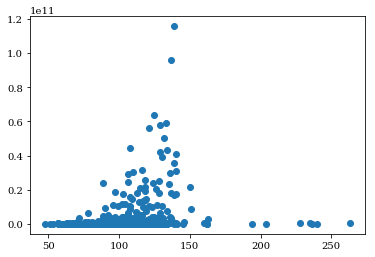

In [1067]:
fig, ax1 = plt.subplots()

ax1.scatter(temporary_df2.showTm, temporary_df2.sales)

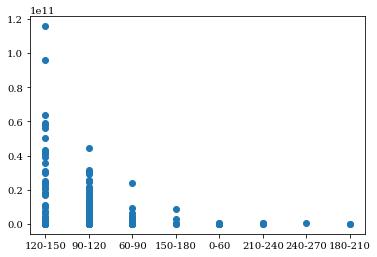

In [1064]:
fig, ax1 = plt.subplots()

ax1.scatter(temporary_df2.binTm, temporary_df2.sales)

산점도를 보면 너무 짧거나(0-60) 너무 긴 (210이상) 영화들은 높은 매출을 기록하지 못했다는 사실을 알 수 있다.

그리고 정말 높은 매출을 기록한 영화들은 120-150분 사이의 영화라고 할 수 있다.
물론 이 시간대라고 해서 모든 영화가 성공한 것은 아니지만, 흥행이 잘되는 영화는 이 시간대를 지킨다는 말이다.

예외는 있다. (반지의제왕 시리즈)

### 0. 심의수준별 영화개봉작 수

In [1077]:
audit_group = temporary_df2.groupby(['audits'])
audit_df = pd.DataFrame({'sales' : audit_group['sales'].sum(),
                        'number' : audit_group['movieCd'].count()}).reset_index()

audit_df['sales/count'] = audit_df.sales / audit_df.number
audit_df = audit_df.sort_values(by='sales', ascending=False)
audit_df

,audits,number,sales,sales/count
1,15세이상관람가,185,839243838046,4.536453e+09
0,12세이상관람가,141,590355297594,4.186917e+09
3,청소년관람불가,188,191584671856,1.019067e+09
2,전체관람가,116,178153509658,1.535806e+09


예상대로 15세이상관람가 영화가 가장 많고, 매출도 높았다.

영화 산업이 하나의 문화로 자리잡은 지금 18세 이하 청소년들의 티켓파워를 무시할 수 없기 때문이다.

### 0. 영화사별 통계


In [1083]:
tp_merge.head()

,salesInten,showCnt,scrnCnt,rankInten,salesShare,salesAmt,rank,audiChange,audiAcc,rnum,...,salesAcc,audiCnt,movieCd,movieNm,rankOldAndNew,audiInten,CurrentDate,multi,Nation,openDt_y
0,1.032712e+09,2176.0,555.0,0.0,41.5,1.032712e+09,1.0,100.0,212267.0,1.0,...,1.674170e+09,138028.0,20161872,너의 이름은.,NEW,138028.0,2017-01-04,N,F,2017-01-04
1,1.704570e+07,221.0,164.0,3.0,47.0,1.870170e+07,1.0,1365.7,6420.0,1.0,...,4.367070e+07,3034.0,20173301,"서서평, 천천히 평온하게",OLD,2827.0,2017-04-26,Y,K,2017-04-26
2,6.696477e+08,3800.0,800.0,3.0,73.9,7.133156e+08,1.0,1877.0,121534.0,1.0,...,9.424733e+08,95271.0,20164844,불한당: 나쁜 놈들의 세상,OLD,90452.0,2017-05-17,N,K,2017-05-17
3,1.383250e+07,143.0,76.0,0.0,65.1,1.383250e+07,1.0,100.0,3383.0,1.0,...,2.758100e+07,1800.0,20160483,꿈의 제인,NEW,1800.0,2017-05-31,Y,K,2017-05-31
4,8.979500e+06,272.0,117.0,0.0,30.5,8.979500e+06,1.0,100.0,2655.0,1.0,...,1.681300e+07,1236.0,20168041,용순,NEW,1236.0,2017-06-08,Y,K,2017-06-08


In [1092]:
temporary_df3 = pd.merge(temporary_df2, tp_merge, on='movieCd', how='inner')
temporary_df3 = temporary_df3[ ['movieCd', 'movieNm_x', 'company', 'genres',
                               'sales', 'multi_x', 'nation', 'scrnCnt']]
temporary_df3.head(10)

,movieCd,movieNm_x,company,genres,sales,multi_x,nation,scrnCnt
0,20150976,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,판타지,115694170837,N,K,1538.0
1,20162869,택시운전사,(주)쇼박스,드라마,95852510649,N,K,1446.0
2,20151228,공조,씨제이이앤엠(주),액션,63782557326,N,K,900.0
3,20167303,스파이더맨: 홈 커밍,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,액션,59102154520,N,F,1703.0
4,20170590,1987,씨제이이앤엠(주),드라마,58162055145,N,K,1299.0
5,20172742,범죄도시,(주)키위미디어그룹,범죄,56317354349,N,K,600.0
6,20161481,군함도,씨제이이앤엠(주),액션,50504572168,N,K,2027.0
7,20162442,청년경찰,롯데쇼핑㈜롯데엔터테인먼트,액션,44378539516,N,K,1102.0
8,20151229,더 킹,(주)넥스트엔터테인먼트월드(NEW),범죄,43485622535,N,K,1125.0
9,20164721,미녀와 야수,월트디즈니컴퍼니코리아 유한책임회사,멜로/로맨스,42110166579,N,F,1244.0


In [1312]:
comp_group = movie_comp.groupby(['company'])
comp_df = pd.DataFrame({'sales' : comp_group['sales'].sum(),
                        'avgsales' : comp_group['sales'].mean(),
                        'number' : comp_group['movieCd'].count(),
                        'totscreen' : comp_group['scrnCnt'].sum(),
                       'avgscreen' : comp_group['scrnCnt'].mean()}).reset_index()

comp_df['sales/count'] = comp_df.sales / comp_df.number
comp_df = comp_df.sort_values(by='avgscreen', ascending=False).reset_index(drop=True)
comp_df

,company,avgsales,avgscreen,number,sales,totscreen,sales/count
0,씨제이이앤엠(주),1.508640e+10,675.473684,19,286641536164,12834.0,1.508640e+10
1,롯데쇼핑㈜롯데엔터테인먼트,1.675094e+10,713.285714,14,234513155341,9986.0,1.675094e+10
2,(주)쇼박스,2.647613e+10,913.285714,7,185332897203,6393.0,2.647613e+10
3,월트디즈니컴퍼니코리아 유한책임회사,1.610391e+10,826.900000,10,161039068351,8269.0,1.610391e+10
4,유니버설픽쳐스인터내셔널 코리아(유),9.027410e+09,530.588235,17,153465973121,9020.0,9.027410e+09
5,(주)넥스트엔터테인먼트월드(NEW),8.294251e+09,516.133333,15,124413761334,7742.0,8.294251e+09
6,워너브러더스 코리아(주),1.009391e+10,734.583333,12,121126870813,8815.0,1.009391e+10
7,이십세기폭스코리아(주),9.945077e+09,669.833333,12,119340922820,8038.0,9.945077e+09
8,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,7.783521e+09,479.800000,10,77835207784,4798.0,7.783521e+09
9,메가박스중앙(주)플러스엠,6.700817e+09,425.000000,10,67008174572,4250.0,6.700817e+09


주요 배급사별 영화의 개봉당일 평균 스크린 개수이다.

흥행 보장 수표인 외국 배급사들 (월트디즈니, 워너브러더스, 이십세기폭스, 유니버설)을 제외하면 상위 국내 배급사들은 (주)쇼박스, 롯데엔터테인먼트, CjE&M, 키위미디어 그룹 순서대로 높다.

이중 롯데, CJE&M은 각각 롯데시네마와 CGV와 한가족이고, 결국 롯데시네마와 CGV는 이들 배급사의 영화를 몰아줄 가능성이 큰 환경에 처해있다.



In [1311]:
comp_df = comp_df.sort_values(by='totscreen', ascending=False).reset_index(drop=True)
comp_df[['company', 'sales', 'sales']]

,company,totscreen,sales
0,씨제이이앤엠(주),12834.0,286641536164
1,롯데쇼핑㈜롯데엔터테인먼트,9986.0,234513155341
2,유니버설픽쳐스인터내셔널 코리아(유),9020.0,153465973121
3,워너브러더스 코리아(주),8815.0,121126870813
4,월트디즈니컴퍼니코리아 유한책임회사,8269.0,161039068351
5,이십세기폭스코리아(주),8038.0,119340922820
6,(주)넥스트엔터테인먼트월드(NEW),7742.0,124413761334
7,(주)쇼박스,6393.0,185332897203
8,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,4798.0,77835207784
9,CGV아트하우스,4519.0,40492123484


전체 스크린 총합으로 보면 CJ와 롯데엔터테인먼트가 1,2위를 차지했다.

결국 같은 계열사의 영화일수록 훨씬 많은 스크린이 배정된다는 사실을 알 수 있다.

Text(0,0.5,'Tot sales')

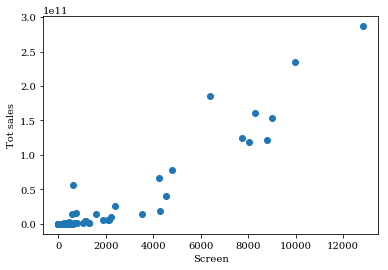

In [1112]:
fig, ax1 = plt.subplots()

ax1.scatter(comp_df.totscreen, comp_df.sales)
ax1.set_xlabel("Screen")
ax1.set_ylabel("Tot sales")

산점도를 봐도 스크린의 개수와 매출은 비례한다.

### 0. 배우들의 영향력

In [1117]:
b['20150976']['actors'][0:4]

[{'cast': '강림', 'castEn': '', 'peopleNm': '하정우', 'peopleNmEn': 'HA Jung-woo'},
 {'cast': '자홍', 'castEn': '', 'peopleNm': '차태현', 'peopleNmEn': 'CHA Tae-hyun'},
 {'cast': '해원맥', 'castEn': '', 'peopleNm': '주지훈', 'peopleNmEn': 'JU Ji-hoon'},
 {'cast': '덕춘', 'castEn': '', 'peopleNm': '김향기', 'peopleNmEn': 'KIM Hyang-gi'}]

In [1124]:
genre_sales.genres.value_counts()

드라마       1
SF        1
미스터리      1
뮤지컬       1
멜로/로맨스    1
스릴러       1
공포(호러)    1
판타지       1
공연        1
액션        1
코미디       1
기타        1
가족        1
어드벤처      1
범죄        1
사극        1
애니메이션     1
다큐멘터리     1
Name: genres, dtype: int64

In [1125]:
topScreen.head()

,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen
0,20150976,14410170,신과함께-죄와 벌,N,K,2017-12-20,115694170837,55198,213198,2.095985e+06
1,20154427,3867,불온한 당신,Y,K,2017-07-20,28908500,349,402,8.283238e+04
2,20155324,88,소통과 거짓말,Y,K,2017-11-09,506000,11,11,4.600000e+04
3,20160465,4005,메리 크리스마스 미스터 모,Y,K,2017-12-14,28591800,462,580,6.188701e+04
4,20160477,1330,나의 연기 워크샵,Y,K,2017-12-28,10067500,171,203,5.887427e+04


In [1140]:
for i in range(len(topScreen)) :
    for item in b[topScreen.iloc[i,0]]['actors'][0:4] :
        print(item['peopleNm'])


하정우
차태현
주지훈
김향기
장선
김권후
김선영
박지훈
기주봉
오정환
고원희
전여빈
김소희
이관헌
김강은
성호준
이민지
구교환
이주영
박현영
김혜수
이선균
이희준
최무성
카미키 류노스케
카미시라이시 모네
나가사와 마사미
이치하라 에수코
이수민
송강호
토마스 크레취만
유해진
진용욱
목규리
김경옥
문수현
김은주
서성광
이로운
이승호
톰 하디
마크 라이런스
케네스 브래너
킬리언 머피
설경구
임시완
김희원
전혜진
최시형
전여빈
채서진
요조
현빈
유지태
배성우
박성웅
홍경인
고유진
배슬기
김기연
이수경
최덕문
박근록
김동영
라이언 고슬링
해리슨 포드
아나 디 아르마스
실비아 획스
노강민
신은수
최상현
최윤재
백서빈
최이선
정준영
오경원
서갑숙
김선영
박지훈
양윤식
정우성
곽도원
김갑수
김의성
이상희
서아연
윤은지
김주후
마크 해밀
캐리 피셔
아담 드라이버
데이지 리들리
김윤석
하정우
유해진
김태리
박명호
김순희
박철준
박철훈
문소리
성병숙
윤상화
전여빈
후쿠야마 마사하루
야쿠쇼 코지
히로세 스즈
마동석
윤계상
조재윤
최귀화
윤안나
안은새
강다연
도세진
강하늘
김무열
문성근
나영희
박성웅
윤승아
오승훈
사우
딜런 오브라이언
테일러 키취
마이클 키튼
토빈 벨
칼럼 키스 레니
클레 베넷
맷 패스모어
주민하
정보름
정성훈
박건우
이현호
서동갑
조성우
허연정
나문희
이제훈
박철민
염혜란
김새벽
조현철
김유석
손수현
리우진
박병은
이선
이미자
함수정
홍소영
마린 백트
제레미 레니에
임만호
김용순
크리스 헴스워스
톰 히들스턴
케이트 블란쳇
이드리스 엘바
데인 드한
알리시아 비칸데르
크리스토프 왈츠
윤진영
정성훈
김준섭
오인천
스티븐 연
지나 로드리게즈
재커리 레비
오프라 윈프리
아담 드라이버
골시프테 파라하니
박인환
오미희
남경읍
서정호
에밀리 왓슨
닉 프로스트
야마자키 켄토
카와구치 하루나
케이시 애플렉
루니 마라
마이크 보겔
에리카 크리스틴슨
페이 더너웨이
로버트 포스터
옥한흠
줄리아 로버츠
오웬 윌슨
제이콥 트렘블레이
성지루
전미선
권소현
양홍석
조수하
김경윤
손현우
이정훈


In [1209]:
topScreen[topScreen.movieNm == '머니백']

,movieCd,audience,movieNm,multi,nation,openDate,sales,screen,show,sales/screen


In [1212]:

def to_won(number):
    word = str(number)
    n = len(word)
    units = ['', '만', '억', '조']
    left = len(word)
    temp_list = []
    i = n
    j = 0
    while (left >= 4):
        temp_list.append(word[i - 4: i] + units[j])
        left = len(word[:i - 4])
        i -= 4
        j += 1
    if (left != 0):
        temp_list.append(word[:i] + units[j])
    return ' '.join(temp_list[::-1])


In [1262]:
col_name_act = ['peopleNm', 'number', 'Sales']

temp_list = []
for i in range(len(topScreen)) :
    for item in b[topScreen.iloc[i,0]]['actors'] :
        temp_list.append([item['peopleNm'], 1, topScreen.iloc[i,6]])

actor_df = pd.DataFrame(temp_list, columns=col_name_act)
actor_group = actor_df.groupby(['peopleNm'])

actor_df = pd.DataFrame({'sales' : actor_group['Sales'].sum(),
                        'number' : actor_group['number'].sum()}).sort_values(by='sales', ascending=False).reset_index()
actor_df['sales/number'] = actor_df.sales / actor_df.number
actor_df['won'] = actor_df['sales'].apply(to_won)
actor_df['won/num'] = actor_df['sales/number'].apply(int).apply(to_won)
#actor_df = actor_df.sort_values(by='sales/number', ascending=False).reset_index(drop=True)
actor_df[['peopleNm', 'number', 'won', 'won/num']]

,peopleNm,number,won,won/num
0,이경영,6,2319억 5120만 5263,386억 5853만 4210
1,유해진,3,2177억 9712만 3120,725억 9904만 1040
2,마동석,4,1942억 8437만 4829,485억 7109만 3707
3,이정은,6,1899억 2977만 9435,316억 5496만 3239
4,김기태,2,1738억 5622만 5982,869억 2811만 2991
5,하정우,2,1738억 5622만 5982,869억 2811만 2991
6,김수안,2,1661억 9874만 3005,830억 9937만 1502
7,이주영,7,1615억 0621만 5272,230억 7231만 6467
8,최귀화,2,1521억 6986만 4998,760억 8493만 2499
9,안용우,3,1519억 8932만 6907,506억 6310만 8969


In [1269]:
for i in range(len(topScreen)) :
    for item in b[topScreen.iloc[i,0]]['actors'] :
        if(item['peopleNm'] == '류준열') :
            print(topScreen.iloc[i,2], b[topScreen.iloc[i,0]]['genres'])

택시운전사 [{'genreNm': '드라마'}]
더 킹 [{'genreNm': '범죄'}, {'genreNm': '드라마'}]
침묵 [{'genreNm': '드라마'}]


출연 횟수로만 보면 이름이 생소한 조연분들의 출연이 가장 많다.

또한 재밌는 점은 임채헌/엄상현씨 등 성우분들의 애니메이션 중복 출연도 많다는 점이다.

해외 배우로는 데인 드한이 5번으로 가장 높으나 국내 개봉작만을 살펴봤기에 전체에서도 그렇다고 볼 수는 없다.



In [1147]:
actor_df = actor_df.sort_values(by='sales', ascending=False)
actor_df.head(10)

,peopleNm,number,sales,sales/number
38,유해진,3,217797123120,7.259904e+10
222,하정우,2,173856225982,8.692811e+10
142,차태현,2,118232764277,5.911638e+10
180,김향기,2,116669855937,5.833493e+10
608,주지훈,1,115694170837,1.156942e+11
96,이수민,2,95853349649,4.792667e+10
472,토마스 크레취만,1,95852510649,9.585251e+10
1291,송강호,1,95852510649,9.585251e+10
193,현빈,2,95093109121,4.754655e+10
176,김규백,2,94883111684,4.744156e+10


매출 총합으로 보면 유해진, 하정우, 차태현, 김향기, 주지훈이 2017년의 Top 5를 차지했다.

여기에는 매출 1,2위인 '신과함께', '택시운전사'의 흥행이 큰 역할을 했다.

In [521]:
import matplotlib
print(matplotlib.__file__)

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/__init__.py


In [522]:
!sudo cp /usr/share/fonts/truetype/nanum/Nanum* /home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/


In [541]:
! ls -l /usr/share/fonts/truetype/nanum

total 133056
-rw-r--r-- 1 root root  4184028 Oct  3  2014 NanumBarunGothic.ttf
-rw-r--r-- 1 root root  4413912 Oct  3  2014 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root  4917332 Oct  3  2014 NanumBarunGothicLight.ttf
-rw-r--r-- 1 root root  4790084 Oct  3  2014 NanumBarunGothicUltraLight.ttf
-rw-r--r-- 1 root root 10028540 Oct  3  2014 NanumBarunpenB.ttf
-rw-r--r-- 1 root root 11033840 Oct  3  2014 NanumBarunpenR.ttf
-rw-r--r-- 1 root root  3745376 Oct  3  2014 NanumBrush.ttf
-rw-r--r-- 1 root root  4343844 Oct  3  2014 NanumGothic.ttf
-rw-r--r-- 1 root root  4288380 Oct  3  2014 NanumGothicBold.ttf
-rw-r--r-- 1 root root  7783984 Oct 29  2011 NanumGothicEco.ttf
-rw-r--r-- 1 root root 11021172 Oct 29  2011 NanumGothicEcoBold.ttf
-rw-r--r-- 1 root root 11571064 Oct 29  2011 NanumGothicEcoExtraBold.ttf
-rw-r--r-- 1 root root  4171172 Oct  3  2014 NanumGothicExtraBold.ttf
-rw-r--r-- 1 root root  1523188 Oct  3  2014 NanumGothicLight.ttf
-rw-r--r-- 1 root root  2315924 May  5  2010 Nanu

In [538]:
import matplotlib

[f.name for f in matplotlib.font_manager.fontManager.ttflist]

['DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmr10',
 'STIXGeneral',
 'STIXGeneral',
 'cmtt10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmss10',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'cmb10',
 'cmsy10',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'cmmi10']